In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re

In [2]:
visulization_data = pd.read_csv('../output/visualization_data.csv')

In [3]:
visulization_data.sample(5)

,title,NER,rating,dietary_restriction,Cuisine,complexity
8623,Chocolate Peanut Butter Balls,"['margarine', 'confectioners sugar', 'peanut b...",3,['unknown'],['Unknown'],3
820,Ukrainian Uncooked Cheese Pashka Recipe,"['cream cheese', 'butter', 'egg yolks', 'sugar...",3,['vegetarian'],['French'],3
7636,Manicotti,"['cottage cheese', 'Ricotta cheese', 'Mozzarel...",3,['non_vegetarian'],['Unknown'],3
6055,Shrimp Burger,"['Shrimp', 'stalks Celery', 'Parsley', 'Green ...",3,['non_vegetarian'],['Unknown'],3
6105,Salty Dog,"['vodka', 'salt']",3,['unknown'],['Unknown'],3


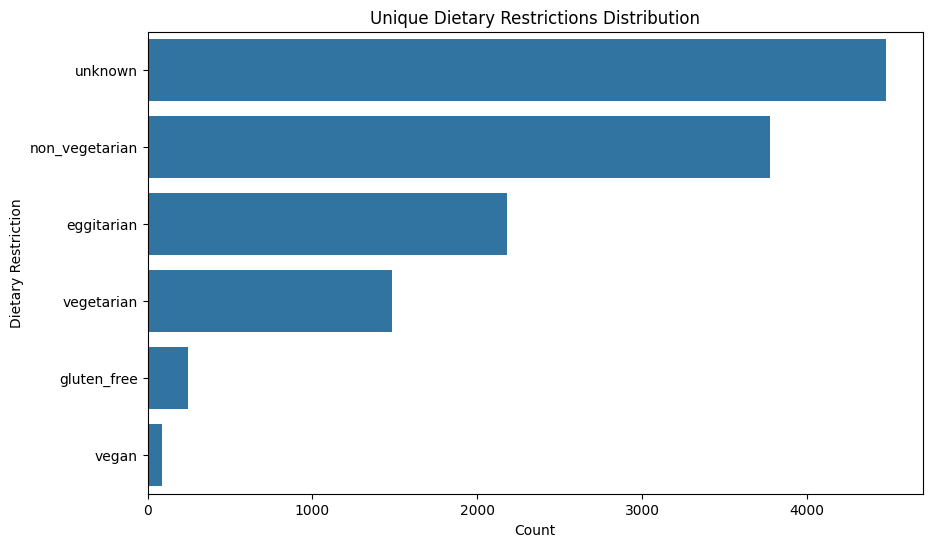

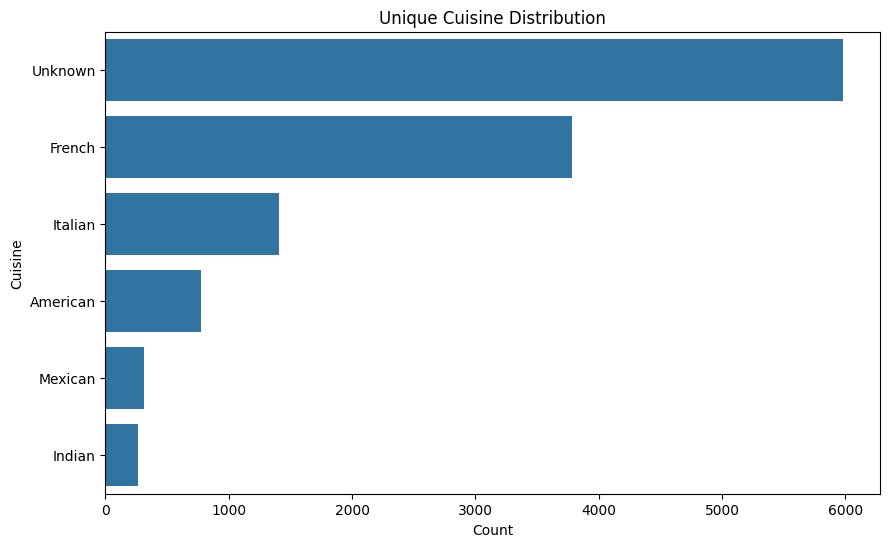

In [4]:

# Data Preprocessing for Visualization
dietary_restrictions_copy = visulization_data['dietary_restriction'].apply(lambda x: ', '.join(ast.literal_eval(x)) if isinstance(x, str) else ', '.join(x))
cuisine_copy = visulization_data['Cuisine'].apply(lambda x: ', '.join(ast.literal_eval(x)) if isinstance(x, str) else ', '.join(x))

# Visualize Unique Dietary Restrictions
unique_dietary_restrictions = dietary_restrictions_copy.str.split(', ').explode().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_dietary_restrictions.values, y=unique_dietary_restrictions.index)
plt.title('Unique Dietary Restrictions Distribution')
plt.xlabel('Count')
plt.ylabel('Dietary Restriction')
plt.show()

# Visualize Unique Cuisine Distribution
unique_cuisines = cuisine_copy.str.split(', ').explode().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_cuisines.values, y=unique_cuisines.index)
plt.title('Unique Cuisine Distribution')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

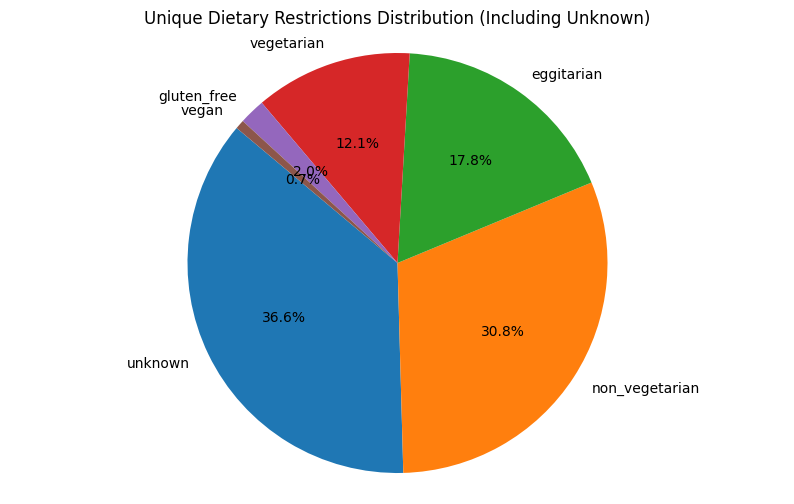

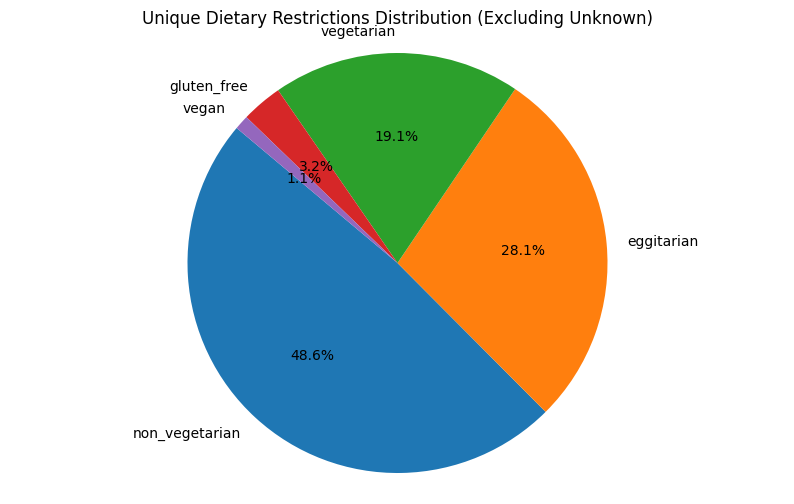

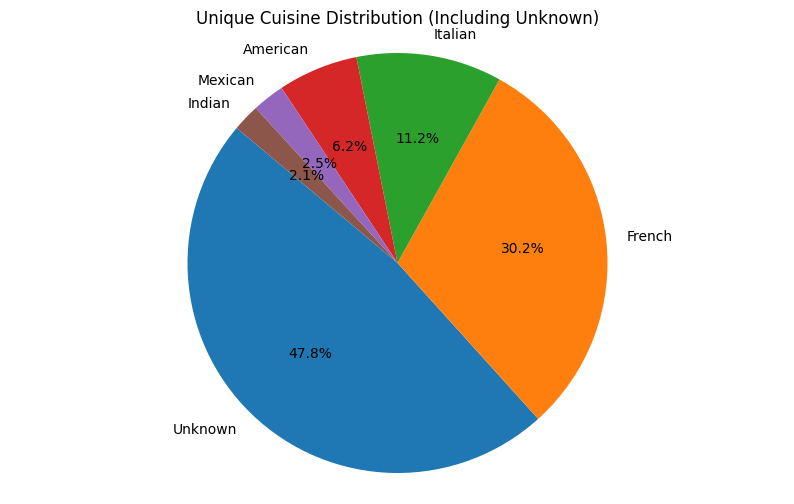

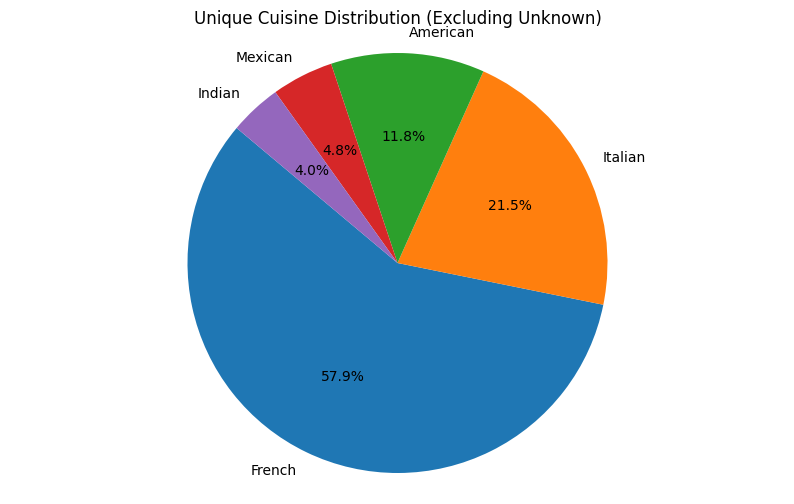

In [5]:

# Data Preprocessing for Visualization
dietary_restrictions_copy = visulization_data['dietary_restriction'].apply(lambda x: ', '.join(ast.literal_eval(x)) if isinstance(x, str) else ', '.join(x))
cuisine_copy = visulization_data['Cuisine'].apply(lambda x: ', '.join(ast.literal_eval(x)) if isinstance(x, str) else ', '.join(x))

# Visualize Unique Dietary Restrictions (Including Unknown)
unique_dietary_restrictions = dietary_restrictions_copy.str.split(', ').explode().value_counts()

plt.figure(figsize=(10, 6))
plt.pie(unique_dietary_restrictions, labels=unique_dietary_restrictions.index, autopct='%1.1f%%', startangle=140)
plt.title('Unique Dietary Restrictions Distribution (Including Unknown)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualize Unique Dietary Restrictions (Excluding Unknown)
unique_dietary_restrictions_excl_unknown = unique_dietary_restrictions.drop('unknown', errors='ignore')

plt.figure(figsize=(10, 6))
plt.pie(unique_dietary_restrictions_excl_unknown, labels=unique_dietary_restrictions_excl_unknown.index, autopct='%1.1f%%', startangle=140)
plt.title('Unique Dietary Restrictions Distribution (Excluding Unknown)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualize Unique Cuisine Distribution (Including Unknown)
unique_cuisines = cuisine_copy.str.split(', ').explode().value_counts()

plt.figure(figsize=(10, 6))
plt.pie(unique_cuisines, labels=unique_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title('Unique Cuisine Distribution (Including Unknown)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualize Unique Cuisine Distribution (Excluding Unknown)
unique_cuisines_excl_unknown = unique_cuisines.drop('Unknown', errors='ignore')

plt.figure(figsize=(10, 6))
plt.pie(unique_cuisines_excl_unknown, labels=unique_cuisines_excl_unknown.index, autopct='%1.1f%%', startangle=140)
plt.title('Unique Cuisine Distribution (Excluding Unknown)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

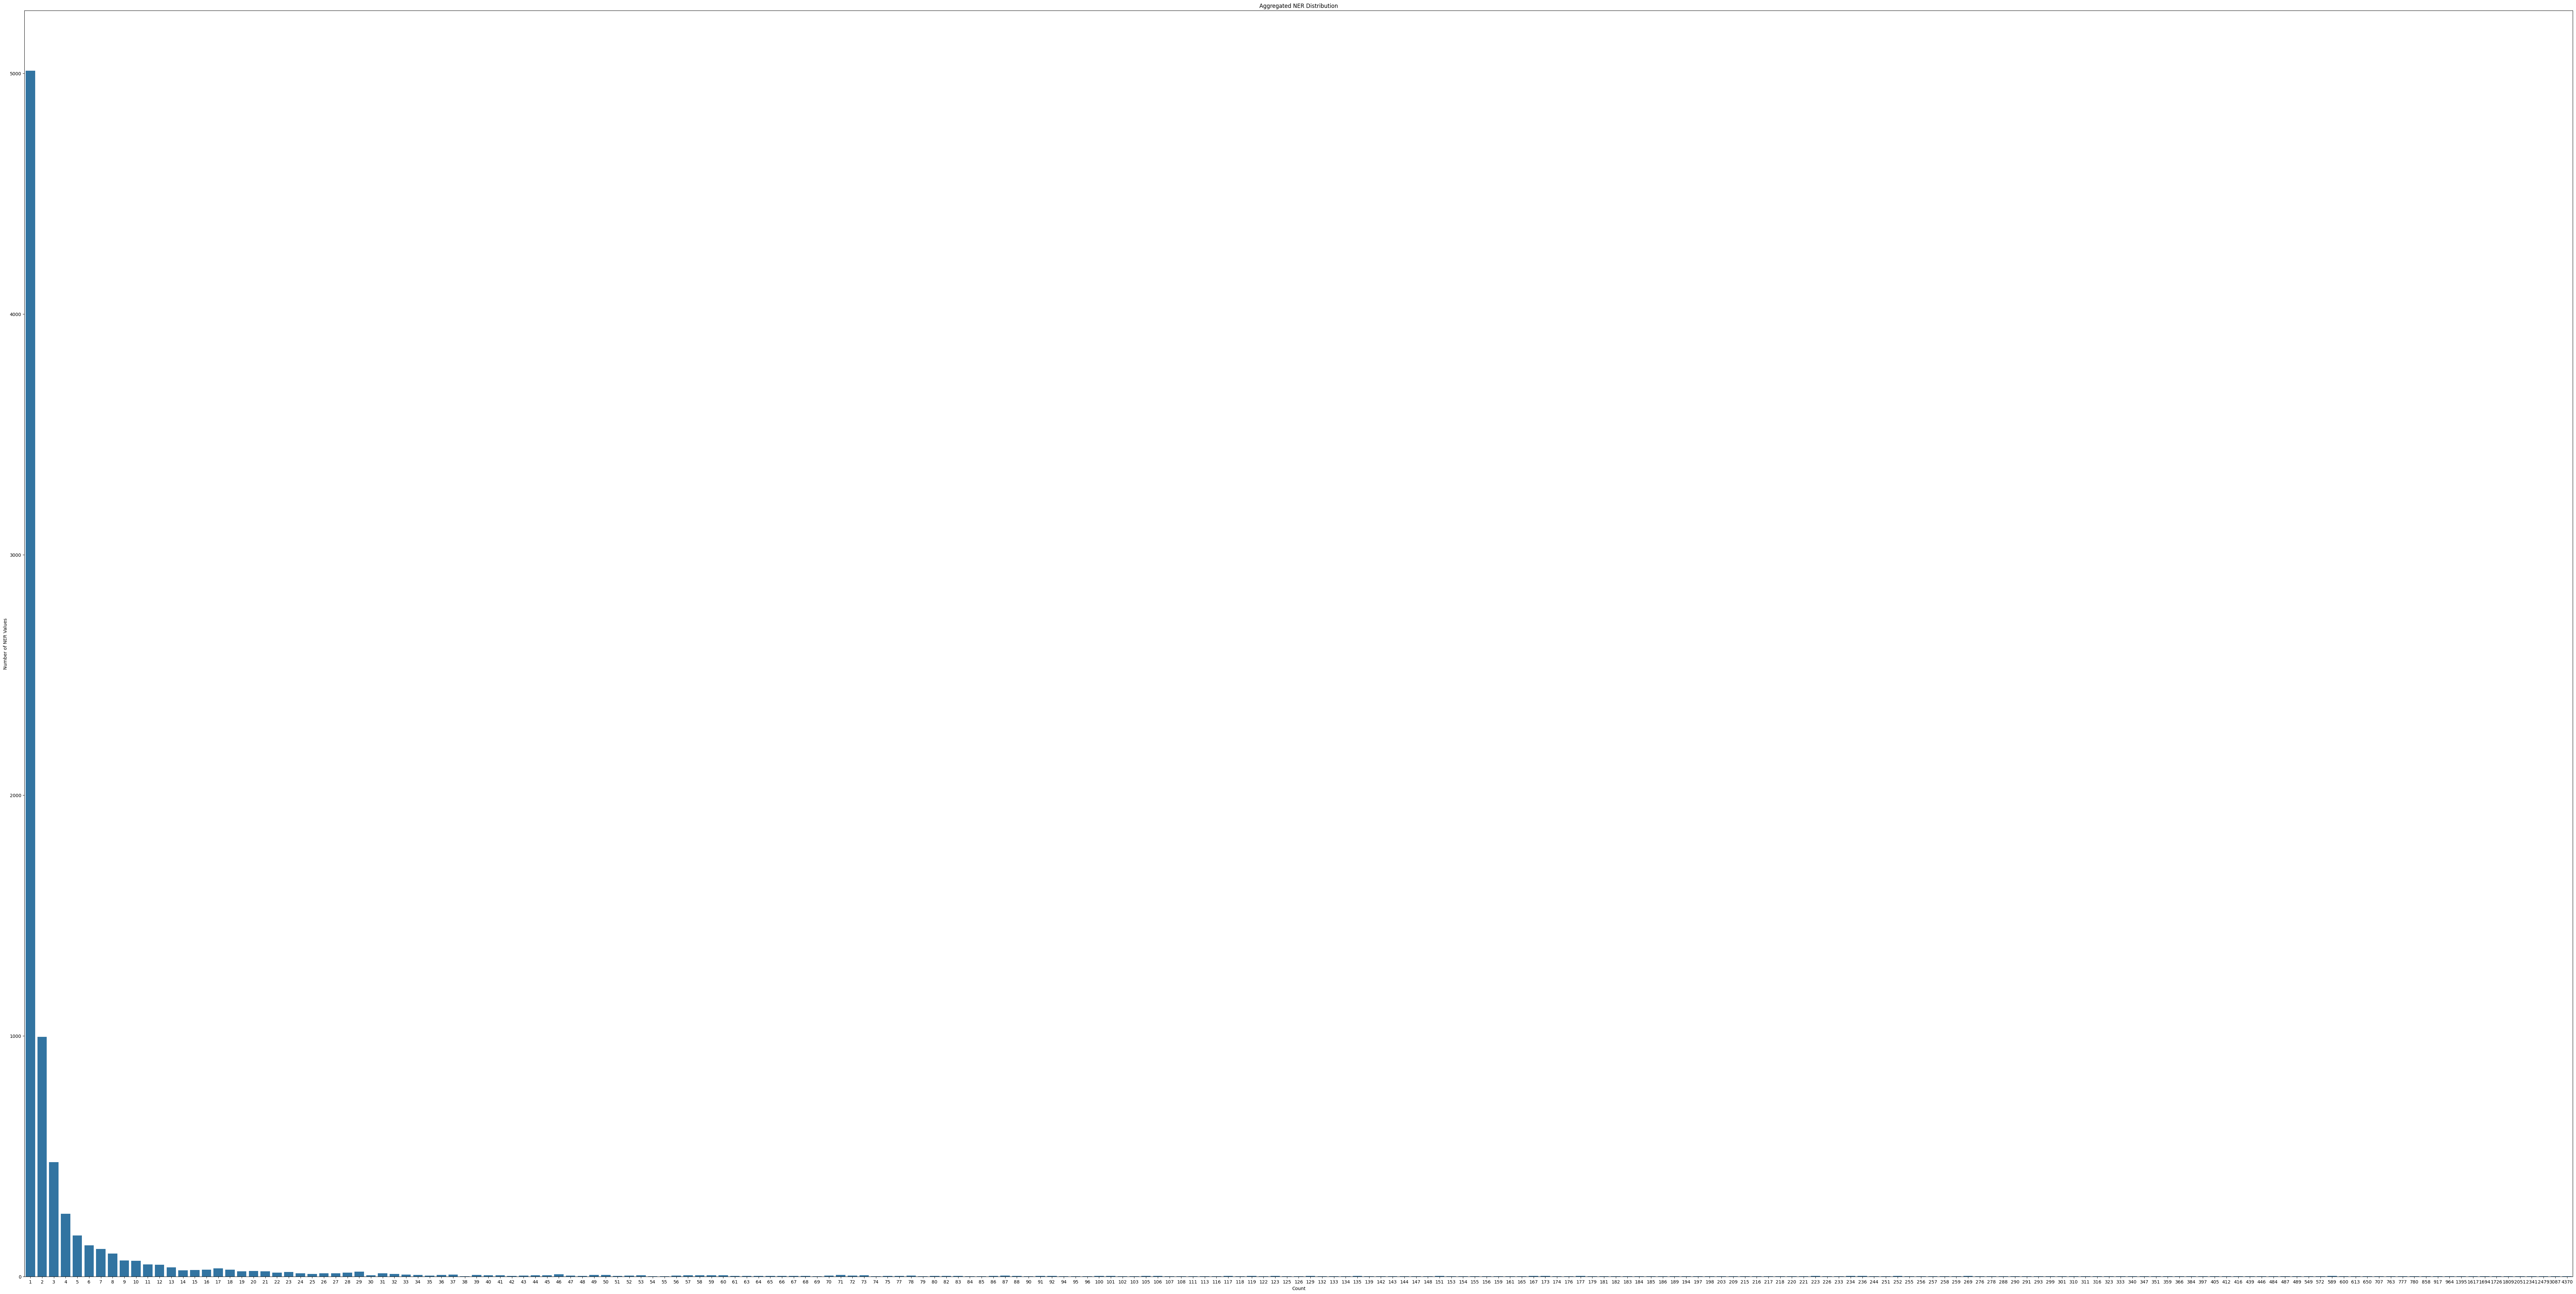

In [ ]:

# Data Preprocessing for NER Visualization
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val

def clean_text(text):
    # Remove special characters
    return re.sub(r'[^\w\s]', '', text)

ner_copy = visulization_data['NER'].apply(lambda x: [clean_text(item) for item in safe_literal_eval(x)] if isinstance(x, str) else [clean_text(item) for item in x])
ner_copy = ner_copy.apply(lambda x: ', '.join(x))
unique_ner = ner_copy.str.split(', ').explode().value_counts()

# Aggregate counts
aggregated_counts = unique_ner.value_counts().sort_index()

# Visualize Aggregated NER Data
plt.figure(figsize=(100, 50))
sns.barplot(x=aggregated_counts.index, y=aggregated_counts.values)
plt.title('Aggregated NER Distribution')
plt.xlabel('Count')
plt.ylabel('Number of NER Values')
plt.show()

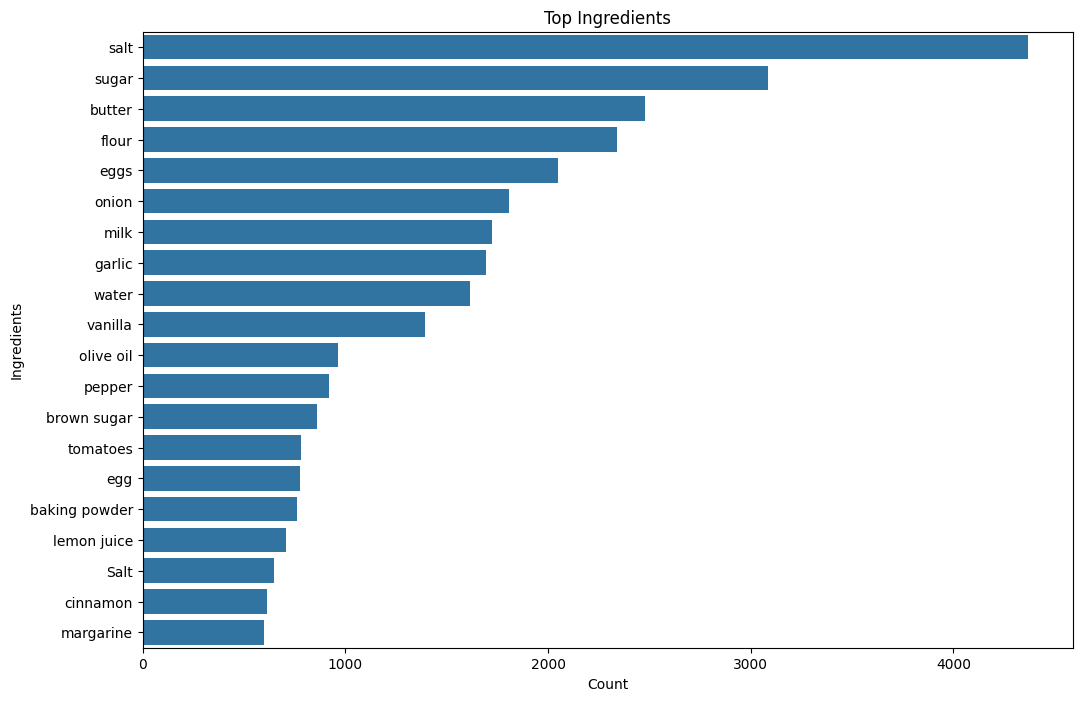

In [7]:
# Data Preprocessing for Ingredients Visualization
ingredients_copy = visulization_data['NER'].apply(lambda x: [clean_text(item) for item in safe_literal_eval(x)] if isinstance(x, str) else [clean_text(item) for item in x])
ingredients_copy = ingredients_copy.apply(lambda x: ', '.join(x))
unique_ingredients = ingredients_copy.str.split(', ').explode().value_counts()

# Limit the number of ingredients displayed
max_display_ingredients = 20
top_ingredients = unique_ingredients.head(max_display_ingredients)

# Visualize Top Ingredients
plt.figure(figsize=(12, 8))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index)
plt.title('Top Ingredients')
plt.xlabel('Count')
plt.ylabel('Ingredients')
plt.show()

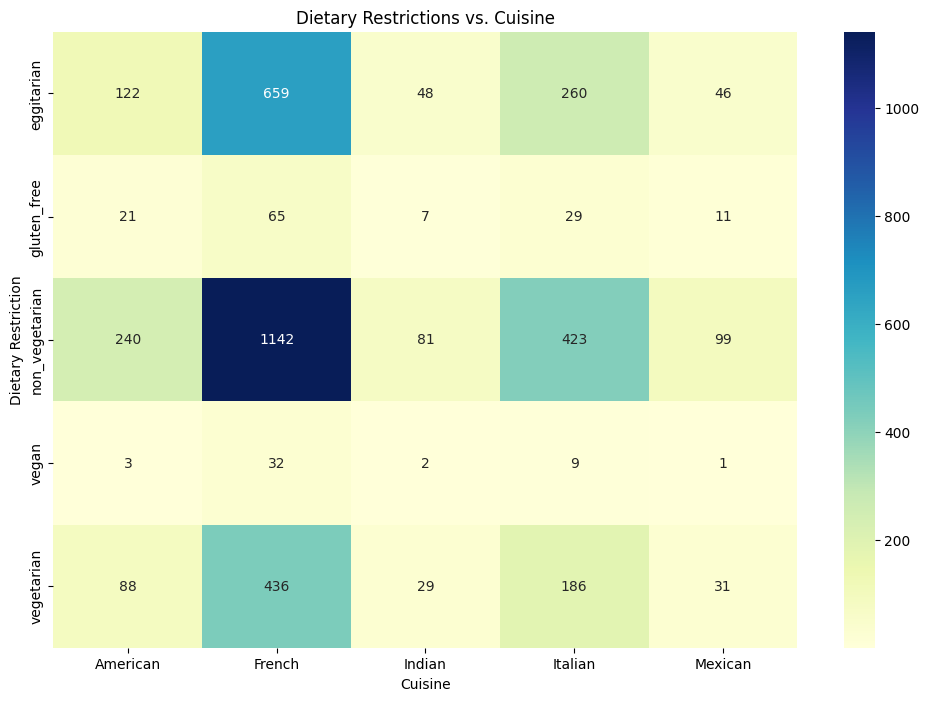

In [ ]:

# Data Preprocessing for Visualization
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val

def clean_text(text):
    # Remove special characters
    return re.sub(r'[^\w\s]', '', text)

# Clean and preprocess dietary restrictions and cuisine columns
dietary_restrictions_copy = visulization_data['dietary_restriction'].apply(lambda x: [clean_text(item) for item in safe_literal_eval(x)] if isinstance(x, str) else [clean_text(item) for item in x])
cuisine_copy = visulization_data['Cuisine'].apply(lambda x: [clean_text(item) for item in safe_literal_eval(x)] if isinstance(x, str) else [clean_text(item) for item in x])

# Remove "unknown" values
dietary_restrictions_copy = dietary_restrictions_copy.apply(lambda x: [item for item in x if item.lower() != 'unknown'])
cuisine_copy = cuisine_copy.apply(lambda x: [item for item in x if item.lower() != 'unknown'])

# Explode lists into individual values
dietary_restrictions_exploded = dietary_restrictions_copy.explode().reset_index(drop=True)
cuisine_exploded = cuisine_copy.explode().reset_index(drop=True)

# Create a DataFrame with exploded values
exploded_df = pd.DataFrame({
    'Dietary Restriction': dietary_restrictions_exploded,
    'Cuisine': cuisine_exploded
})

# Drop rows with NaN values
exploded_df.dropna(inplace=True)

# Create a crosstab of dietary restrictions and cuisine
dietary_cuisine_crosstab = pd.crosstab(exploded_df['Dietary Restriction'], exploded_df['Cuisine'])

# Visualize Dietary Restrictions vs. Cuisine
plt.figure(figsize=(12, 8))
sns.heatmap(dietary_cuisine_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Dietary Restrictions vs. Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Dietary Restriction')
plt.show()

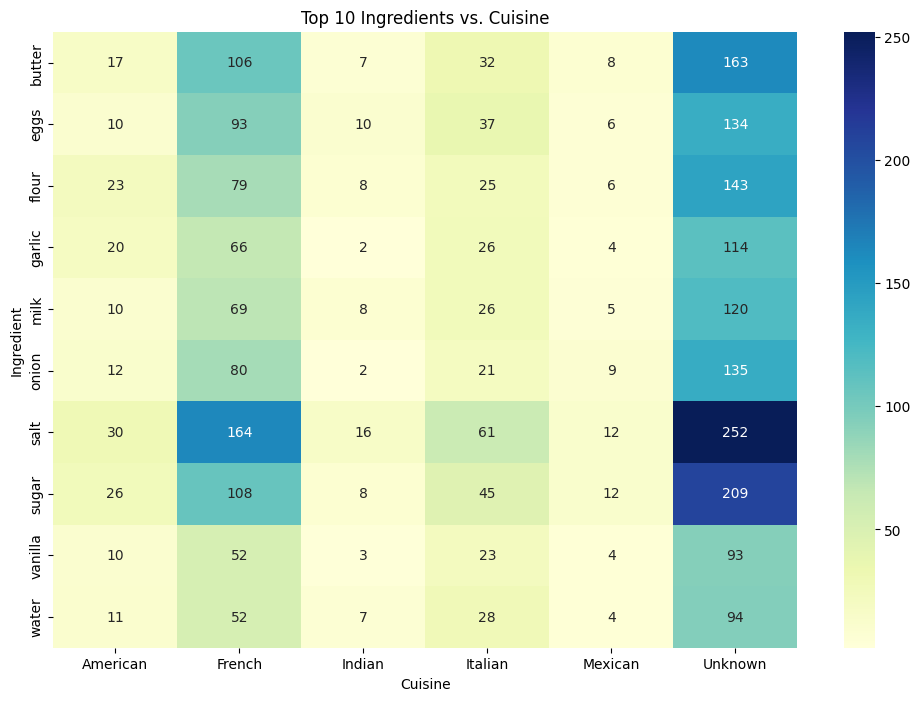

In [ ]:

# Data Preprocessing for Visualization
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val

def clean_text(text):
    # Remove special characters
    return re.sub(r'[^\w\s]', '', text)

# Clean and preprocess ingredients and cuisine columns
ingredients_copy = visulization_data['NER'].apply(lambda x: [clean_text(item) for item in safe_literal_eval(x)] if isinstance(x, str) else [clean_text(item) for item in x])
cuisine_copy = visulization_data['Cuisine'].apply(lambda x: [clean_text(item) for item in safe_literal_eval(x)] if isinstance(x, str) else [clean_text(item) for item in x])

# Explode lists into individual values
ingredients_exploded = ingredients_copy.explode().reset_index(drop=True)
cuisine_exploded = cuisine_copy.explode().reset_index(drop=True)

# Create a DataFrame with exploded values
exploded_df = pd.DataFrame({
    'Ingredient': ingredients_exploded,
    'Cuisine': cuisine_exploded
})

# Drop rows with NaN values
exploded_df.dropna(inplace=True)

# Count the occurrences of each ingredient
ingredient_counts = exploded_df['Ingredient'].value_counts()

# Select the top 10 ingredients
top_10_ingredients = ingredient_counts.head(10).index

# Filter the DataFrame to include only the top 10 ingredients
filtered_df = exploded_df[exploded_df['Ingredient'].isin(top_10_ingredients)]

# Create a crosstab of top 10 ingredients and cuisines
ingredient_cuisine_crosstab = pd.crosstab(filtered_df['Ingredient'], filtered_df['Cuisine'])

# Visualize Top 10 Ingredients vs. Cuisine
plt.figure(figsize=(12, 8))
sns.heatmap(ingredient_cuisine_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 Ingredients vs. Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Ingredient')
plt.show()